The General Aptitude Test Battery (GATB) is an occupationally oriented multi-aptitude test that measures distinct aptitudes using 12 separate tests (8 pencil and paper tests, and 4 performance tests). The tests are supposed to capture people’s different abilities including the cognitive, perceptual, and psychomotor domains. In a study, the 12 GATB tests were administrated to 255 individuals, and the following is the sample covariance matrix of the variables.

<img src="SEM_01/ModelStructure.png">

<center>p* = p x (p + 1) / 2 = 78 <br>
q = 2 x p + k x (k + 1) / 2 - k = 27 <br>
df = p* - q = 51 > 0</center>

In [1]:
library(semPlot)
library(lavaan)
library(corrplot)

This is lavaan 0.5-23.1097
lavaan is BETA software! Please report any bugs.


In [2]:
plot_matrix <- function(matrix_toplot){
corrplot(matrix_toplot, is.corr = FALSE, 
               type = 'lower', 
               order = "original", 
               tl.col='black', tl.cex=.75)
}

In [3]:
data = as.matrix(read.table('GATB.cov', fill=TRUE, col.names=paste("V", 1:12)))
data[upper.tri(data)] <- t(data)[upper.tri(data)]
rownames(data) <- colnames(data)
data

,V.1,V.2,V.3,V.4,V.5,V.6,V.7,V.8,V.9,V.10,V.11,V.12
V.1,1.02,0.30,0.66,0.34,0.79,0.25,0.70,0.26,0.34,0.35,0.39,0.35
V.2,0.30,1.01,0.37,0.58,0.47,0.76,0.41,0.20,0.30,0.25,0.32,0.33
V.3,0.66,0.37,1.00,0.53,0.55,0.47,0.58,0.25,0.28,0.28,0.36,0.23
V.4,0.34,0.58,0.53,1.03,0.43,0.62,0.44,0.17,0.21,0.21,0.27,0.28
V.5,0.79,0.47,0.55,0.43,1.02,0.37,0.53,0.24,0.29,0.34,0.36,0.27
V.6,0.25,0.76,0.47,0.62,0.37,1.00,0.40,0.21,0.30,0.23,0.21,0.31
V.7,0.70,0.41,0.58,0.44,0.53,0.40,1.03,0.39,0.32,0.40,0.44,0.43
V.8,0.26,0.20,0.25,0.17,0.24,0.21,0.39,1.04,0.49,0.54,0.44,0.42
V.9,0.34,0.30,0.28,0.21,0.29,0.30,0.32,0.49,1.01,0.77,0.47,0.45
V.10,0.35,0.25,0.28,0.21,0.34,0.23,0.40,0.54,0.77,1.04,0.48,0.48


V.1  = Name comparison (clerical perception)<br>
V.2  = Arithmetic reasoning (numerical aptitude)<br>
V.3  = Three dimensional space (spatial aptitude)<br>
V.4  = Vocabulary (verbal aptitude)<br>
V.5  = Tool matching (form perception)<br>
V.6  = Computational (numerical aptitude)<br>
V.7  = Shape matching (form perception)<br>
V.8  = Mark making (motor coordination)<br>
V.9  = Place (manual dexterity)<br>
V.10 = Turn (manual dexterity)<br>
V.11 = Assemble (finger dexterity)<br>
V.12 = Dissemble (finger dexterity)

In [4]:
model <- '
   # latent variables
     Perceptu =~ V.1 + V.3 + V.5 + V.7
     Aptitude =~ V.2 + V.4 + V.6
     Dexterit =~ V.8 + V.9 + V.10 + V.11 + V.12
   # regressions
   #  Perceptu ~ Aptitude + Dexterit
   # latent covariances
     Perceptu ~~ Aptitude + Dexterit
     Aptitude ~~ Dexterit
   # residual covariances
   #  y1 ~~ y5
   #  y2 ~~ y4 + y6
'

In [5]:
fit = sem(model, fixed.x = F, 
                 sample.cov = data, 
                 sample.nobs = 255) 

In [6]:
summary(fit, fit.measures = TRUE)

lavaan (0.5-23.1097) converged normally after  29 iterations

  Number of observations                           255

  Estimator                                         ML
  Minimum Function Test Statistic              315.882
  Degrees of freedom                                51
  P-value (Chi-square)                           0.000

Model test baseline model:

  Minimum Function Test Statistic             1784.244
  Degrees of freedom                                66
  P-value                                        0.000

User model versus baseline model:

  Comparative Fit Index (CFI)                    0.846
  Tucker-Lewis Index (TLI)                       0.801

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -3631.922
  Loglikelihood unrestricted model (H1)      -3473.981

  Number of free parameters                         27
  Akaike (AIC)                                7317.844
  Bayesian (BIC)                              7413.459
  Sa

In [7]:
parameterEstimates(fit)
# fitted(fit)

lhs,op,rhs,est,se,z,pvalue,ci.lower,ci.upper
Perceptu,=~,V.1,1.0000000,0.00000000,NA,NA,1.0000000,1.0000000
Perceptu,=~,V.3,0.7776848,0.05694408,13.656992,0.000000e+00,0.6660765,0.8892931
Perceptu,=~,V.5,0.8866959,0.05373169,16.502290,0.000000e+00,0.7813837,0.9920081
Perceptu,=~,V.7,0.8095120,0.05702507,14.195721,0.000000e+00,0.6977449,0.9212791
Aptitude,=~,V.2,1.0000000,0.00000000,NA,NA,1.0000000,1.0000000
Aptitude,=~,V.4,0.8176325,0.06933803,11.791977,0.000000e+00,0.6817324,0.9535325
Aptitude,=~,V.6,1.0197443,0.06996827,14.574382,0.000000e+00,0.8826090,1.1568796
Dexterit,=~,V.8,1.0000000,0.00000000,NA,NA,1.0000000,1.0000000
Dexterit,=~,V.9,1.2997434,0.13186799,9.856398,0.000000e+00,1.0412868,1.5581999
Dexterit,=~,V.10,1.3482870,0.13523584,9.969894,0.000000e+00,1.0832296,1.6133444


Warning message in qgraph(Edgelist, labels = nLab, bidirectional = Bidir, directed = Directed, :
“The following arguments are not documented and likely not arguments of qgraph and thus ignored: loopRotation; residuals; residScale; residEdge; CircleEdgeEnd; node.label.cex”

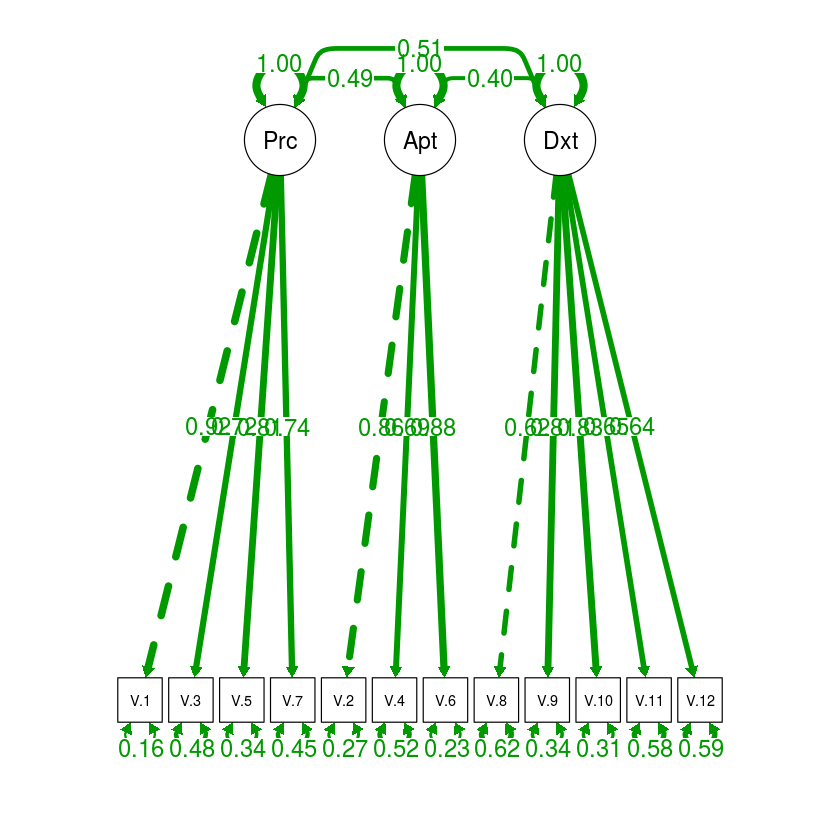

In [8]:
semPaths(fit, what='std', 
         node.label.cex=5,
         edge.label.cex=1.25, curvePivot = TRUE, 
         fade=FALSE)

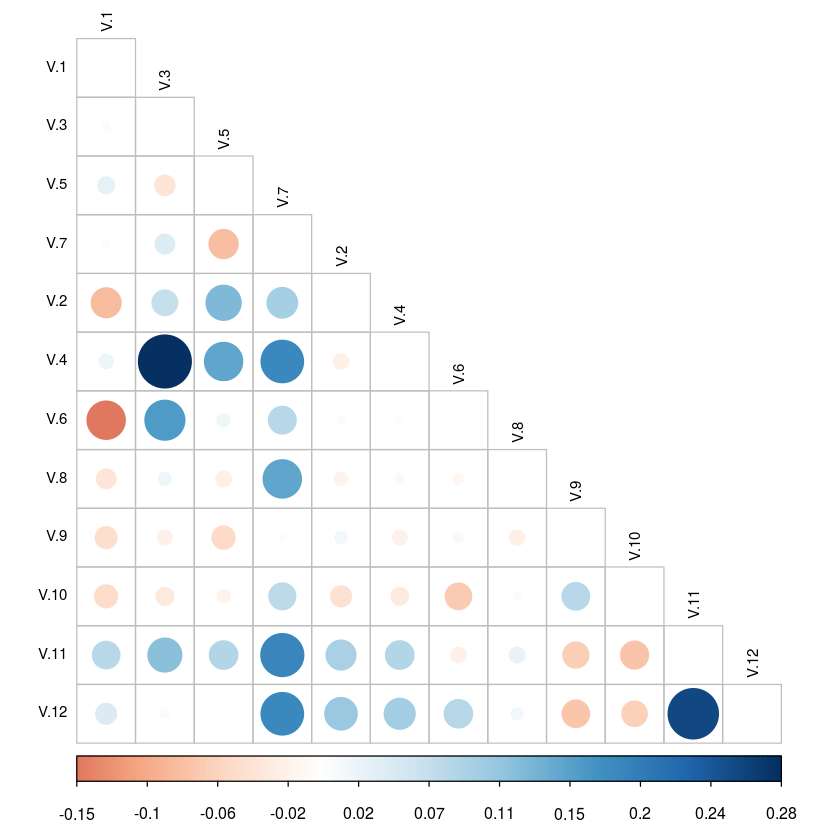

In [9]:
# Check Missing
plot_matrix(residuals(fit)$cov)

In [10]:
residuals(fit)

,V.1,V.3,V.5,V.7,V.2,V.4,V.6,V.8,V.9,V.10,V.11,V.12
V.1,-9.939838e-08,-7.349852e-03,2.895815e-02,5.287509e-03,-8.959805e-02,2.108058e-02,-1.470711e-01,-3.892998e-02,-4.854036e-02,-5.304123e-02,7.608551e-02,4.359423e-02
V.3,-7.349852e-03,7.015733e-08,-4.159825e-02,3.959296e-02,6.647945e-02,2.809397e-01,1.601232e-01,1.733924e-02,-2.222306e-02,-3.346967e-02,1.156511e-01,-8.121662e-03
V.5,2.895815e-02,-4.159825e-02,4.649833e-07,-8.564307e-02,1.237450e-01,1.467114e-01,1.733704e-02,-2.509708e-02,-5.447213e-02,-1.749130e-02,8.159767e-02,-1.530523e-03
V.7,5.287509e-03,3.959296e-02,-8.564307e-02,-6.917843e-08,9.396021e-02,1.811847e-01,7.779119e-02,1.473086e-01,5.296351e-03,7.327574e-02,1.853950e-01,1.813857e-01
V.2,-8.959805e-02,6.647945e-02,1.237450e-01,9.396021e-02,-1.509563e-07,-2.393679e-02,6.631491e-03,-1.872444e-02,1.555730e-02,-4.482623e-02,9.021581e-02,1.055549e-01
V.4,2.108058e-02,2.809397e-01,1.467114e-01,1.811847e-01,-2.393679e-02,-1.911351e-08,4.026953e-03,-8.861586e-03,-2.243119e-02,-3.108142e-02,8.208822e-02,9.644651e-02
V.6,-1.470711e-01,1.601232e-01,1.733704e-02,7.779119e-02,6.631491e-03,4.026953e-03,-1.610794e-07,-1.306673e-02,9.964410e-03,-7.054958e-02,-2.386496e-02,8.122742e-02
V.8,-3.892998e-02,1.733924e-02,-2.509708e-02,1.473086e-01,-1.872444e-02,-8.861586e-03,-1.306673e-02,1.116827e-08,-2.380214e-02,6.883733e-03,2.530717e-02,1.510463e-02
V.9,-4.854036e-02,-2.222306e-02,-5.447213e-02,5.296351e-03,1.555730e-02,-2.243119e-02,9.964410e-03,-2.380214e-02,3.442420e-07,7.681846e-02,-6.859469e-02,-7.588402e-02
V.10,-5.304123e-02,-3.346967e-02,-1.749130e-02,7.327574e-02,-4.482623e-02,-3.108142e-02,-7.054958e-02,6.883733e-03,7.681846e-02,2.648245e-07,-7.868085e-02,-6.557681e-02


In [11]:
mi = modificationIndices(fit)
head(mi[order(-mi$mi), ], 10)

,lhs,op,rhs,mi,epc,sepc.lv,sepc.all,sepc.nox
115,V.9,~~,V.10,65.91529,0.36687001,0.36687001,0.35936970,0.35936970
120,V.11,~~,V.12,62.77538,0.34020512,0.34020512,0.33486367,0.33486367
39,Aptitude,=~,V.1,61.23490,-0.45790736,-0.39280315,-0.38969792,-0.38969792
56,V.1,~~,V.5,30.87946,0.23185371,0.23185371,0.22820251,0.22820251
76,V.5,~~,V.7,22.51673,-0.16517734,-0.16517734,-0.16178502,-0.16178502
40,Aptitude,=~,V.3,20.00271,0.30725944,0.26357400,0.26409234,0.26409234
118,V.10,~~,V.11,18.68583,-0.17669825,-0.17669825,-0.17139711,-0.17139711
70,V.3,~~,V.6,17.74409,0.11954392,0.11954392,0.12001456,0.12001456
77,V.5,~~,V.2,14.63103,0.09868419,0.09868419,0.09760978,0.09760978
117,V.9,~~,V.12,14.51225,-0.15156996,-0.15156996,-0.15066012,-0.15066012
